In [1]:
import pandas as pd

In [8]:
df = pd.read_csv(r'C:\Users\satya\Downloads\metadata.csv',nrows=10000)

In [9]:
df=df['title']

In [10]:
len(df)

10000

In [11]:
df

0       Clinical features of culture-proven Mycoplasma pneumoniae infections at King Abdulaziz University Hospital, Jeddah, Saudi Arabia
1                                                                             Nitric oxide: a pro-inflammatory mediator in lung disease?
2                                                                                        Surfactant protein-D and pulmonary host defense
3                                                                                                   Role of endothelin-1 in lung disease
4                                                               Gene expression in epithelial cells in response to pneumovirus infection
                                                                      ...                                                               
9995                                                                                                    Variability of hepatitis C virus
9996                                     

In [12]:
pd.set_option("display.max_colwidth", None)
df.head()

0    Clinical features of culture-proven Mycoplasma pneumoniae infections at King Abdulaziz University Hospital, Jeddah, Saudi Arabia
1                                                                          Nitric oxide: a pro-inflammatory mediator in lung disease?
2                                                                                     Surfactant protein-D and pulmonary host defense
3                                                                                                Role of endothelin-1 in lung disease
4                                                            Gene expression in epithelial cells in response to pneumovirus infection
Name: title, dtype: object

In [13]:
df.to_csv('dv.csv')

import all the necessary packages

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

Loading BokehJS ...

download stopwords

In [15]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\satya\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [16]:
!pip install spacy
import spacy 
from spacy.lang.en.stop_words import STOP_WORDS

print(len(STOP_WORDS))
print(STOP_WORDS)

ERROR: pyldavis 3.3.1 requires funcy, which is not installed.
ERROR: pyldavis 3.3.1 requires future, which is not installed.
ERROR: pyldavis 3.3.1 requires gensim, which is not installed.
ERROR: pyldavis 3.3.1 requires joblib, which is not installed.
ERROR: pyldavis 3.3.1 requires numexpr, which is not installed.
ERROR: pyldavis 3.3.1 requires scikit-learn, which is not installed.
ERROR: pyldavis 3.3.1 requires scipy, which is not installed.
ERROR: pyldavis 3.3.1 requires sklearn, which is not installed.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\program files\\python38\\Lib\\site-packages\\pydantic'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Using cached https://files.pythonhosted.org/packages/37/7a/f491d487b8699df61a70c204362a9e4fe657a3593bdec0a0b7f38d98c339/spacy-3.4.1-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/4c/f3/b8e7c5b68515f6c0c881b0cd64c03b17e6bc3005b0193be6485c0d5f98f0/pydantic-1.9.2-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/79/44/7c56d123f40a9186e155db4832cb5c5086b94d9871ac421a5115e3a4d537/spacy_legacy-3.0.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8a/c4/d15f1e627fff25443ded77ea70a7b5532d6371498f9285d44d62587e209c/tqdm-4.64.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/34/40/0d2f208c4a79f06aa530cb6becc67740bb30b0a72d41055a0fa491f3e50f/cymem-2.0.6-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/61/4c/3ca1dec23a20466be5789601e87a4ebb4f1d6f53d324f9126b7821346869/spacy_loggers-1.0.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/p

In [17]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Data preprocessing. remove the stopwords and punctuation marks

In [18]:

STOPWORDS = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
STOPWORDS=STOPWORDS|STOP_WORDS
def clean_text(text):
    stop_not = " ".join([i for i in text.lower().split() if i not in STOPWORDS and len(i) > 3])
    punctuation_free = "".join([i for i in stop_not if i not in exclude])
    normalized = " ".join(lemma.lemmatize(word) for word in punctuation_free.split())
    return normalized
document_cleaned = [clean_text(text).split() for text in df]

In [19]:
document_cleaned

[['clinical',
  'feature',
  'cultureproven',
  'mycoplasma',
  'pneumoniae',
  'infection',
  'king',
  'abdulaziz',
  'university',
  'hospital',
  'jeddah',
  'saudi',
  'arabia'],
 ['nitric', 'oxide', 'proinflammatory', 'mediator', 'lung', 'disease'],
 ['surfactant', 'proteind', 'pulmonary', 'host', 'defense'],
 ['role', 'endothelin1', 'lung', 'disease'],
 ['gene',
  'expression',
  'epithelial',
  'cell',
  'response',
  'pneumovirus',
  'infection'],
 ['sequence',
  'requirement',
  'strand',
  'transfer',
  'nidovirus',
  'discontinuous',
  'subgenomic',
  'synthesis'],
 ['debate',
  'transfusing',
  'normal',
  'haemoglobin',
  'level',
  'improve',
  'outcome'],
 ['21st',
  'international',
  'symposium',
  'intensive',
  'care',
  'emergency',
  'medicine',
  'brussels',
  'belgium',
  '2023',
  'march',
  '2001'],
 ['heme', 'oxygenase1', 'carbon', 'monoxide', 'pulmonary', 'medicine'],
 ['technical',
  'description',
  'rod',
  'realtime',
  'public',
  'health',
  'surveilla

In [20]:
type(STOP_WORDS)

set

In [21]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

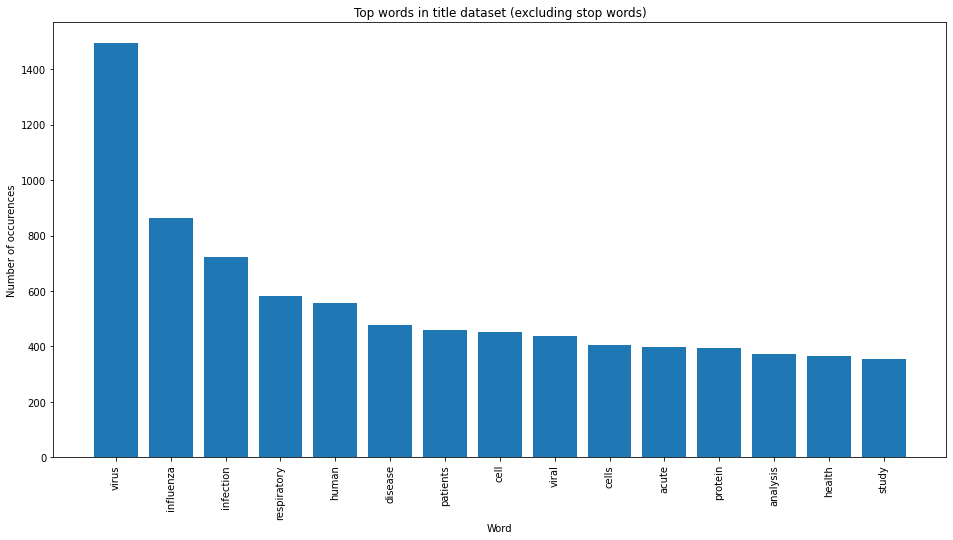

In [22]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in title dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [23]:
df.shape[0]

10000

In [24]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [25]:
tagged_tweet = [TextBlob(df[i]).pos_tags for i in range(df.shape[0])]

text blob is used to part-of-speech tagging

In [26]:
tagged_tweet_df = pd.DataFrame({'tags':tagged_tweet})

word_counts = [] 
pos_counts = {}

for tweet in tagged_tweet_df[u'tags']:
    word_counts.append(len(tweet))
    for tag in tweet:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per tweet: ', np.mean(word_counts))

Total number of words:  123573
Mean number of words per tweet:  12.3573


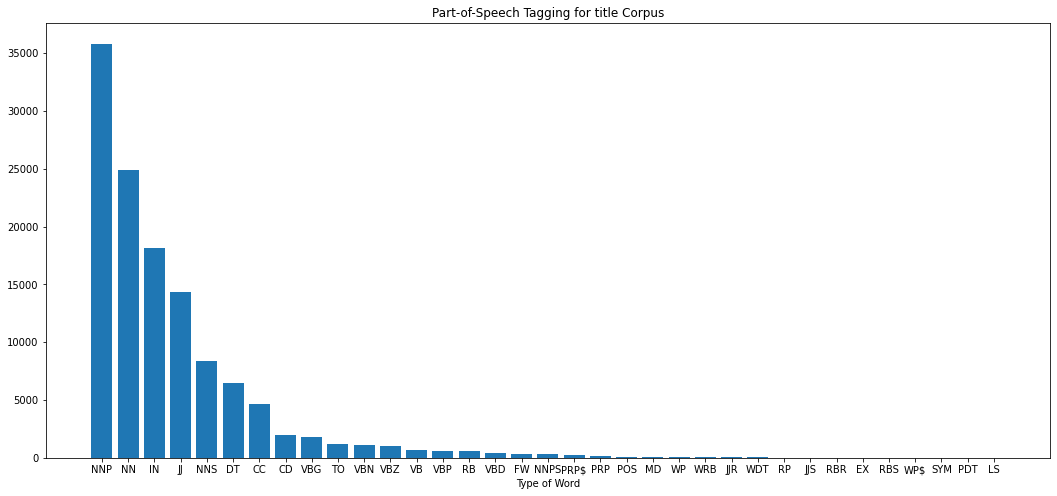

In [27]:
pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

fig, ax = plt.subplots(figsize=(18,8))
ax.bar(range(len(pos_counts)), pos_sorted_counts);
ax.set_xticks(range(len(pos_counts)));
ax.set_xticklabels(pos_sorted_types);
ax.set_title('Part-of-Speech Tagging for title Corpus');
ax.set_xlabel('Type of Word');

text is converted to vector form

In [28]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = df.sample(n=10000, random_state=0).values

print('Text before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Text after vectorization: \n{}'.format(small_document_term_matrix[123]))

Text before vectorization: Encephalopathy in pediatric patients after allogeneic hematopoietic stem cell transplantation is associated with a poor prognosis
Text after vectorization: 
  (0, 14362)	1
  (0, 2543)	1
  (0, 13422)	1
  (0, 1372)	1
  (0, 812)	1
  (0, 6385)	1
  (0, 10521)	1
  (0, 11038)	1
  (0, 4636)	1
  (0, 10564)	1
  (0, 11373)	1


4 number of topics are selected

In [29]:
n_topics = 5

LSA model

In [30]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [31]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [32]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [33]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word)#.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [34]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  virus influenza disease infection infectious respiratory hepatitis vaccine protein analysis
Topic 2:  respiratory patients acute health study infections syndrome care clinical severe
Topic 3:  influenza pandemic der h1n1 und avian 2009 viruses für china
Topic 4:  human cell cells protein viral expression using gene rna induced
Topic 5:  infection viral control patients associated response case respiratory acute report


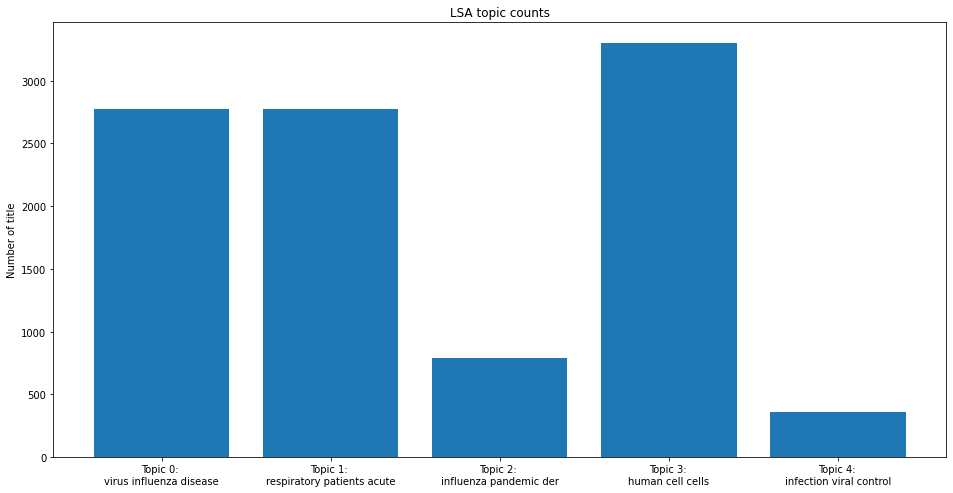

In [35]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of title');
ax.set_title('LSA topic counts');
plt.show()

In [36]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.024s...
[t-SNE] Computed neighbors for 10000 samples in 1.373s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.908836
[t-SNE] KL divergence after 2000 iterations: 0.954380


In [37]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [38]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [39]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

LDA model

In [40]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [41]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [42]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  health der influenza abstracts und china public respiratory infections sars
Topic 2:  virus infection cell cells protein induced human lung expression hepatitis
Topic 3:  influenza patients respiratory virus acute study syndrome pandemic infection severe
Topic 4:  virus viral human infectious disease influenza rna infection cell analysis
Topic 5:  virus vaccine viral infection hiv using influenza antibodies disease human


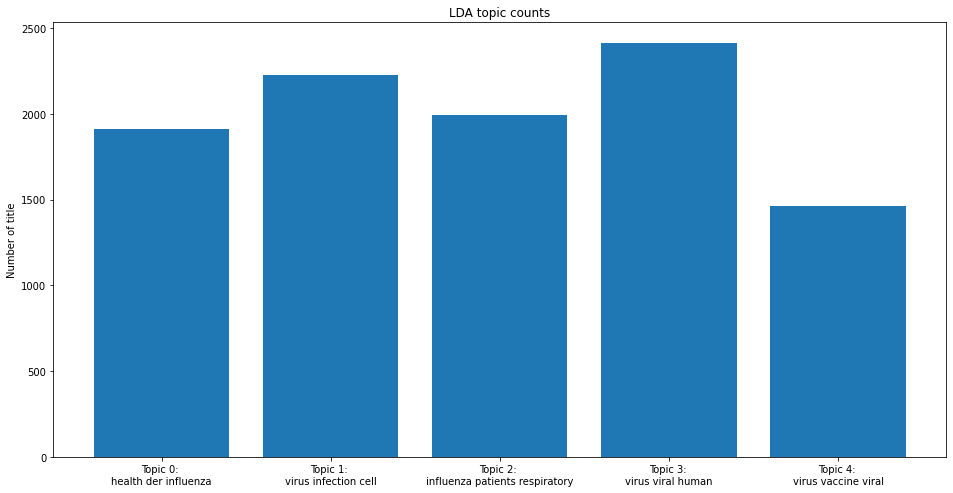

In [43]:
top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of title');

In [44]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.007s...
[t-SNE] Computed neighbors for 10000 samples in 1.420s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.001142
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.191147
[t-SNE] KL divergence after 2000 iterations: 0.946319


In [45]:
top_3_words_lda = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

In [46]:
import gensim
from gensim import corpora
bigram = gensim.models.Phrases(document_cleaned, min_count=5, threshold=100) 
#trigram = gensim.models.Phrases(bigram[document_cleaned], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
data_words_bigrams = make_bigrams(document_cleaned)# Creating the term dictionary of our courpus, 
# where every unique term is assigned an index. 
dictionary = corpora.Dictionary(data_words_bigrams)# Converting list of documents (corpus) 
# into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(text) for text in data_words_bigrams]# Build the LDA model
from gensim.models import LdaModel
lda_model = LdaModel(corpus=doc_term_matrix,id2word=dictionary,num_topics=5,random_state=100,
                     passes=10,alpha=0.31,eta=0.9099999999999999)
lda_model.print_topics()

c:\users\satya\appdata\local\programs\python\python39\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[(0,
  '0.001*"gesellschaft" + 0.001*"abstract" + 0.001*"intensivmedizin" + 0.001*"index_volume" + 0.001*"synthesis" + 0.001*"jahrestagung" + 0.001*"eine" + 0.001*"über" + 0.001*"patienten" + 0.001*"jahrestagung_deutschen"'),
 (1,
  '0.034*"virus" + 0.012*"infection" + 0.012*"cell" + 0.010*"human" + 0.007*"protein" + 0.007*"influenza" + 0.007*"vaccine" + 0.006*"viral" + 0.006*"mouse" + 0.005*"gene"'),
 (2,
  '0.006*"cell" + 0.005*"protein" + 0.004*"effect" + 0.004*"role" + 0.003*"calf" + 0.003*"rat" + 0.003*"regulation" + 0.003*"expression" + 0.003*"lung" + 0.003*"inflammation"'),
 (3,
  '0.014*"patient" + 0.009*"influenza" + 0.009*"infection" + 0.007*"clinical" + 0.006*"study" + 0.006*"health" + 0.006*"pandemic" + 0.005*"disease" + 0.005*"severe" + 0.004*"china"'),
 (4,
  '0.014*"acute" + 0.012*"disease" + 0.011*"respiratory" + 0.010*"syndrome" + 0.008*"model" + 0.006*"sars" + 0.005*"infection" + 0.005*"infectious" + 0.005*"viral" + 0.005*"detection"')]

In [47]:
pip install gensim

You should consider upgrading via the 'c:\users\satya\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [48]:
lda_df = lda_model.get_document_topics(doc_term_matrix,minimum_probability=0)
lda_df = pd.DataFrame(list(lda_df))
num_topics = lda_model.num_topics
lda_df.columns = ['Topic'+str(i) for i in range(num_topics)]
for i in range(len(lda_df.columns)):
    lda_df.iloc[:,i]=lda_df.iloc[:,i].apply(lambda x: x[1])
lda_df['Automated_topic_id'] =lda_df.apply(lambda x: np.argmax(x),axis=1)
lda_df.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Automated_topic_id
0,0.025718,0.025683,0.025614,0.896297,0.026689,3
1,0.047798,0.048845,0.479204,0.050377,0.373775,2
2,0.047944,0.774805,0.058323,0.064224,0.054704,1
3,0.057667,0.059079,0.370402,0.061482,0.451370,4
4,0.036447,0.851517,0.038420,0.036946,0.036669,1


In [49]:
# Compute Perplexity, a measure of how good the model is. lower the better.
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix))# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lda_c_v = coherence_model_lda.get_coherence()
print('\nCoherence Score using c_v: ', coherence_lda_c_v)# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='u_mass')
coherence_lda_u_mass = coherence_model_lda.get_coherence()
print('\nCoherence Score using u_mass: ', coherence_lda_u_mass)


Perplexity:  -8.770130540729932

Coherence Score using c_v:  0.36200734468727275

Coherence Score using u_mass:  -9.182646116930337


In [50]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\satya\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [51]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)

In [52]:
lda_viz

c:\users\satya\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.119217  0.072245       1        1  36.079320
3      0.114666  0.070937       2        1  27.981299
4      0.023872 -0.011725       3        1  16.328223
2     -0.034656 -0.055501       4        1  12.921050
0      0.015335 -0.075955       5        1   6.690108, topic_info=              Term         Freq        Total Category  logprob  loglift
76           virus  1009.000000  1009.000000  Default  30.0000  30.0000
105        patient   310.000000   310.000000  Default  29.0000  29.0000
444          acute   187.000000   187.000000  Default  28.0000  28.0000
23            cell   415.000000   415.000000  Default  27.0000  27.0000
449       syndrome   145.000000   145.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
13555  tratamiento     2.830822     4.846884   Topic5  -7.5608   2.1668
11975   diagnostik     2.803391     4.830107   Topic5  -7.5705   2.1605
3933    derivative     3.974117    10.748495   Topic5  -7.2215   1.7096
35       synthesis     4.765589    37.059650   Topic5  -7.0399   0.6534
324       abstract     5.485106    82.954306   Topic5  -6.8993  -0.0117

[269 rows x 6 columns], token_table=       Topic      Freq                           Term
term                                                 
1139       1  0.020239                           2009
1139       2  0.951213                           2009
324        1  0.012055                       abstract
324        2  0.916167                       abstract
324        5  0.060274                       abstract
...      ...       ...                            ...
11866      2  0.201700  österreichischen_gesellschaft
11866      5  0.605101  österreichischen_gesellschaft
10182      1  0.158826                           über
10182      2  0.158826                           über
10182      5  0.635303                           über

[705 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 5, 3, 1])

In [53]:
from gensim.models import LsiModel
lsi_model = LsiModel(corpus=doc_term_matrix, num_topics=4, id2word=dictionary)
lsi_model.print_topics(num_topics=10,num_words=10)


c:\users\satya\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.767*"virus" + 0.332*"infection" + 0.309*"influenza" + 0.185*"cell" + 0.127*"human" + 0.101*"protein" + 0.100*"disease" + 0.099*"respiratory" + 0.087*"mouse" + 0.077*"patient"'),
 (1,
  '0.617*"infection" + -0.526*"virus" + 0.249*"patient" + 0.209*"acute" + 0.196*"respiratory" + 0.154*"cell" + 0.131*"viral" + 0.122*"study" + 0.115*"human" + 0.103*"severe"'),
 (2,
  '-0.719*"cell" + 0.493*"influenza" + -0.241*"human" + 0.164*"pandemic" + -0.151*"protein" + 0.115*"infection" + -0.106*"expression" + 0.093*"h1n1" + -0.085*"disease" + -0.085*"mouse"'),
 (3,
  '0.624*"influenza" + -0.492*"infection" + 0.363*"cell" + -0.227*"virus" + 0.217*"pandemic" + 0.159*"human" + -0.109*"respiratory" + 0.103*"h1n1" + 0.096*"patient" + 0.083*"vaccine"')]

In [54]:
# Compute Coherence Score for llsi model
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lsi_c_v = coherence_model_lsi.get_coherence()
print('\nCoherence Score for LSI using c_v: ', coherence_lsi_c_v)# Compute Coherence Score for llsi model
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=data_words_bigrams, dictionary=dictionary, coherence='u_mass')
coherence_lsi_u_mass = coherence_model_lsi.get_coherence()
print('\nCoherence Score for LSI using u_mass: ', coherence_lsi_u_mass)

c:\users\satya\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score for LSI using c_v:  0.22784709785088153

Coherence Score for LSI using u_mass:  -4.67807526185445


Compare two models

c:\users\satya\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


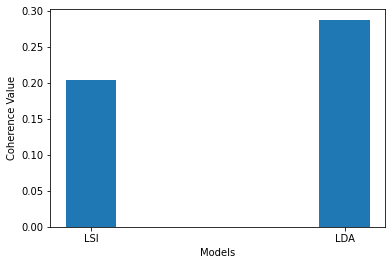

In [55]:
from gensim.models import CoherenceModel
lda_topics = [[word for word, prob in topic] for topicid, topic in lda_model.show_topics(formatted=False)]
lsi_topics = [[word for word, prob in topic] for topicid, topic in lsi_model.show_topics(formatted=False)]
lsi_coherence = CoherenceModel(topics=lsi_topics, texts=data_words_bigrams, dictionary=dictionary, window_size=10).get_coherence()
lda_coherence = CoherenceModel(topics=lda_topics, texts=data_words_bigrams, dictionary=dictionary, window_size=10).get_coherence()
import numpy as np
def topic_model_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')
topic_model_graph([lsi_coherence, lda_coherence],
                   ['LSI',  'LDA'])